<a href="https://colab.research.google.com/github/Msh-Jackson/NYU_Integrated_Marketing/blob/main/%E2%80%9CJackson%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

**Install the Package Pandas and Numpy for the function of "TABLE" and "Math"**

In [ ]:
import pandas as pd
import numpy as np

**Read the marketing data from Github Url ("Read Raw")**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/bank-full.csv',sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**View the data information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Install the pingouin Package**

In [ ]:
pip install pingouin

**Import the pingouin package**

In [ ]:
import pingouin as pg

# Hypothesis Test

**One-Sample T-test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
x=df['age']
pg.ttest(x, 30)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning:

divide by zero encountered in double_scalars



,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,218.985328,45210,two-sided,0.0,"[40.84, 41.03]",1.029895,inf,1.0


In [ ]:
df['age'].mean()

40.93621021432837

**Two-Sample T-Test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
balance_housing = df[df['housing']=='yes']['balance']
balance_no_housing = df[df['housing']=='no']['balance']

In [ ]:
balance_housing.mean()

1175.1030640668523

In [ ]:
balance_no_housing.mean()

1596.5012698570788

In [ ]:
x=balance_housing
y=balance_no_housing
pg.ttest(x, y, paired=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-14.081118,34203.875315,two-sided,6.625426e-45,"[-480.06, -362.74]",0.138728,9.456e+40,1.0


**One-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [ ]:
aov = pg.anova(dv='balance', between='education', data=df)
aov.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,education,3,45207,116.682,0.0,0.008


In [ ]:
df.groupby('education')['balance'].mean()

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

**Two-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [ ]:

aov = pg.anova(dv='balance', between=['education','job'], data=df)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,education,8.458529e+08,3.0,2.819510e+08,30.802,0.000,0.002
1,job,1.966850e+09,11.0,1.788045e+08,19.534,0.000,0.005
2,education * job,5.327554e+08,33.0,1.614410e+07,1.764,0.004,0.001
3,Residual,4.134038e+11,45163.0,9.153594e+06,NaN,NaN,NaN


In [ ]:
df.groupby(['education','job'])['balance'].sum()

education  job          
primary    admin.             194470
           blue-collar       4081580
           entrepreneur       307324
           housemaid          707420
           management         491640
           retired           1494239
           self-employed      172994
           services           333467
           student             54715
           technician         234981
           unemployed         408165
           unknown             89263
secondary  admin.            4708657
           blue-collar       5714177
           entrepreneur       580396
           housemaid          570218
           management        1487048
           retired           2028145
           self-employed      742616
           services          3311338
           student            640031
           technician        5881175
           unemployed        1043027
           unknown             88716
tertiary   admin.             696569
           blue-collar        230838
           en

**Chi-Squared of Independence**

https://pingouin-stats.org/generated/pingouin.chi2_independence.html#pingouin.chi2_independence


In [ ]:
expected, observed, stats = pg.chi2_independence(df, x='loan',
                                                 y='y')

In [ ]:
expected

y,no,yes
loan,,
no,33525.437924,4441.562076
yes,6396.562076,847.437924


In [ ]:
observed

y,no,yes
loan,,
no,33162.5,4804.5
yes,6759.5,484.5


In [ ]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,209.616980,1.0,1.665061e-47,0.068091,1.0
1,cressie-read,0.666667,217.964803,1.0,2.513745e-49,0.069434,1.0
2,log-likelihood,0.000000,237.146048,1.0,1.648199e-53,0.072425,1.0
3,freeman-tukey,-0.500000,254.090511,1.0,3.331960e-57,0.074967,1.0
4,mod-log-likelihood,-1.000000,273.667325,1.0,1.801570e-61,0.077802,1.0
5,neyman,-2.000000,322.752120,1.0,3.642820e-72,0.084491,1.0


**Mann-Whitney U Test (= Wilcoxon rank-sum test)**

https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu

In [ ]:
balance_loan = df[df['loan']=='yes']['balance']
balance_no_loan = df[df['loan']=='no']['balance']

In [ ]:
df.groupby('loan')['balance'].median()

loan
no     496
yes    258
Name: balance, dtype: int64

In [ ]:
x=balance_loan
y=balance_no_loan
pg.mwu(x, y, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,109609078.0,two-sided,1.515910e-165,0.202939,0.398531


#Paired Tests



**Import the data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Msh-Jackson/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/Q_GDP_Capita.csv')
df.head()

,LOCATION,Country,Measure,Frequency,TIME,Unit Code,Value
0,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2017-Q4,USD,50719.7
1,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q1,USD,51371.0
2,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q2,USD,52211.9
3,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q3,USD,52561.7
4,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q4,USD,53023.0


**Conduct the paired-t test to compare the GDP per capita for the first quarter of 2018 and 2019 for all countries**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [ ]:
df_2018_Q2 = df[df.TIME=='2018-Q2'][['Country','Value','TIME']]
df_2018_Q2=df_2018_Q2.groupby(['Country','TIME']).max().reset_index()
df_2018_Q2=df_2018_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2018_Q2.head()

,Country,Value
0,Australia,52211.9
1,Austria,56633.7
2,Belgium,52101.9
3,Bulgaria,22367.3
4,Canada,50094.0


In [ ]:
df_2019_Q2 = df[df.TIME=='2019-Q2'][['Country','Value','TIME']]
df_2019_Q2=df_2019_Q2.groupby(['Country','TIME']).max().reset_index()
df_2019_Q2=df_2019_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2019_Q2.head()

,Country,Value
0,Australia,54425.3
1,Austria,58827.2
2,Belgium,54675.1
3,Bulgaria,24488.9
4,Canada,51537.9


In [ ]:
pre=df_2018_Q2['Value']
post=df_2019_Q2['Value']
from pingouin import ttest
ttest(pre, post, paired=True).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-10.39,38,two-sided,0.0,"[-2255.09, -1519.38]",0.1,7.053e+09,0.09


In [ ]:
df_Figure = df[df.TIME.isin(['2018-Q2','2019-Q2'])][['Country','Value','TIME']].groupby(['Country','TIME']).max().reset_index()
import plotly.express as px
fig = px.bar(df_Figure, x="Country", y="Value",
             color='TIME', barmode='group',
             height=400)
fig.show()

Conduct the Wilcoxon Signed-rank test to compare probability of GDP per capita for the first quarter of 2018 is larger than 2019 or not for all countries



In [ ]:
### install the package
import pingouin as pg
pg.wilcoxon(pre, post, tail='two-sided')

,W-val,tail,p-val,RBC,CLES
Wilcoxon,7.0,two-sided,9.408805e-08,-0.982051,0.460881


# Assumption: Pearson or Spearman Test of Correlations

**Histogram and scatterplot**

In [ ]:
#install package
import seaborn as sns

In [ ]:
df_joint= df_2018_Q2.merge(df_2019_Q2, how='inner',on="Country")
df_joint.columns =['Country','2018_Q2','2019_Q2']
df_joint.head()

,Country,2018_Q2,2019_Q2
0,Australia,52211.9,54425.3
1,Austria,56633.7,58827.2
2,Belgium,52101.9,54675.1
3,Bulgaria,22367.3,24488.9
4,Canada,50094.0,51537.9


**draw scatter and histgram plot**

https://seaborn.pydata.org/generated/seaborn.jointplot.html

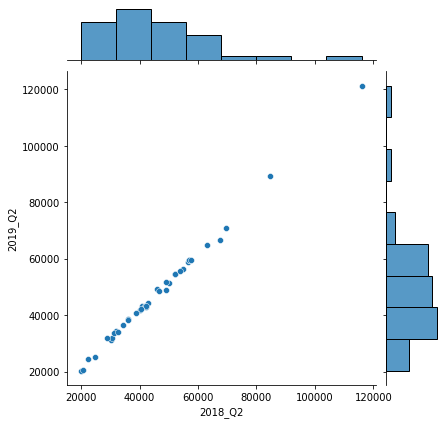

In [ ]:
#draw the plot
sns.jointplot(data=df_joint, x="2018_Q2", y="2019_Q2")

**Test for multivariate normality**

https://pingouin-stats.org/generated/pingouin.multivariate_normality.html

In [ ]:
X = df_joint[['2018_Q2', '2019_Q2']]
pg.multivariate_normality(X, alpha=.05)

HZResults(hz=1.1871993483467551, pval=0.005417587484060071, normal=False)

**We can't reject multivariate normality, so we will use pearson test for correlations**

https://pingouin-stats.org/generated/pingouin.corr.html#pingouin.corr

In [ ]:
x=df_joint['2018_Q2']
y=df_joint['2019_Q2']
pg.corr(x, y, method="pearson").round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,39,0.999,"[1.0, 1.0]",0.997,0.997,0.0,1.642e+44,1.0


#Power Analysis

**Power analysis for T-test**

https://pingouin-stats.org/generated/pingouin.power_ttest.html#pingouin.power_ttest


Note: For a paired T-test, the sample size n corresponds to the number of pairs. For an independent two-sample T-test with equal sample sizes, n corresponds to the sample size of each group (i.e. number of observations in one group).

In [ ]:
#install the package
from pingouin import power_ttest

d is the Cohen d effect size, Power is 1-Type II error, Alpha is the type I error

In [ ]:
### conduct the test
print('n: %.4f' % power_ttest(d=0.1, power=0.80, alpha=0.05))

n: 1570.7331


**Power analysis for ANOVA**

https://pingouin-stats.org/generated/pingouin.power_anova.html#pingouin.power_anova

In [ ]:
# install the package
from pingouin import power_anova

eta is the effect size for ANOVA (the level of correlation across catergories), k is the number of categories, Power is 1-Type II error, alpha is type I error

In [ ]:
### conduct the test
print('n: %.4f' % power_anova(eta=0.1, k=3, power=0.80, alpha=0.05))

n: 29.9255


**Power analysis for Chi-square Test**

https://pingouin-stats.org/generated/pingouin.power_chi2.html#pingouin.power_chi2

In [ ]:
# install the package
from pingouin import power_chi2

dof is the degress of freedom $=(r-1)*(c-1)$, where r is the number of rows in the expected frequency table and c is the nuber of columns in the expected frequency table. W is the effect size, which is the level of correlation. Power is 1-Type II error and Alpha is the type I error. 

In [ ]:
### conduct the test
print('n: %.4f' % power_chi2(dof=1, w=0.3, power=0.80, alpha=0.05))

n: 87.2096
